In [1]:
import tensorflow as tf

In [2]:
a=tf.constant([1,2,3,1,1])
b=tf.constant([0,1,3,4,5])
c=tf.where(tf.greater(a,b),a,b)
print(c)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


X的维度:2,shape:(2, 3)
Y的维度:2,shape:(2, 3)


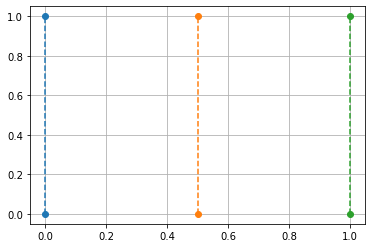

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0.5, 1],[0, 0.5, 1]])
print("X的维度:{},shape:{}".format(X.ndim, X.shape))
Y = np.array([[0, 0, 0],[1, 1, 1]])
print("Y的维度:{},shape:{}".format(Y.ndim, Y.shape))

plt.plot(X, Y, 'o--')
plt.grid(True)
plt.show()


In [5]:
a = np.array([1,2,3])
# 坐标向量
b = np.array([7,8])
# 从坐标向量中返回坐标矩阵
# 返回list,有两个元素,第一个元素是X轴的取值,第二个元素是Y轴的取值
res = np.meshgrid(a,b)
print(res)

[array([[1, 2, 3],
       [1, 2, 3]]), array([[7, 7, 7],
       [8, 8, 8]])]


xv的维度:2,shape:(2, 3)
yv的维度:2,shape:(2, 3)


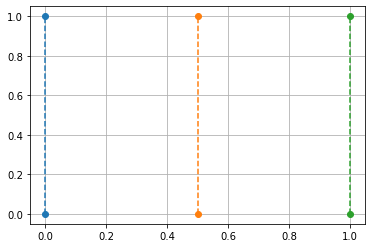

In [6]:
x = np.array([0, 0.5, 1])
y = np.array([0,1])

xv,yv = np.meshgrid(x, y)
print("xv的维度:{},shape:{}".format(xv.ndim, xv.shape))
print("yv的维度:{},shape:{}".format(yv.ndim, yv.shape))

plt.plot(xv, yv, 'o--')
plt.grid(True)
plt.show()


In [7]:
SEED = 23455

rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 15000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss_mse = tf.reduce_mean(tf.square(y_ - y))

    grads = tape.gradient(loss_mse, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())


After 0 training steps,w1 is 
[[-0.8096241]
 [ 1.4855158]] 

After 500 training steps,w1 is 
[[-0.21934736]
 [ 1.6984867 ]] 

After 1000 training steps,w1 is 
[[0.08939705]
 [1.673225  ]] 

After 1500 training steps,w1 is 
[[0.28368816]
 [1.5853056 ]] 

After 2000 training steps,w1 is 
[[0.42324293]
 [1.4906038 ]] 

After 2500 training steps,w1 is 
[[0.5310549]
 [1.4053346]] 

After 3000 training steps,w1 is 
[[0.6172508]
 [1.3328412]] 

After 3500 training steps,w1 is 
[[0.687201 ]
 [1.2725208]] 

After 4000 training steps,w1 is 
[[0.7443262]
 [1.2227542]] 

After 4500 training steps,w1 is 
[[0.7910986]
 [1.1818361]] 

After 5000 training steps,w1 is 
[[0.82943517]
 [1.1482395 ]] 

After 5500 training steps,w1 is 
[[0.860872 ]
 [1.1206709]] 

After 6000 training steps,w1 is 
[[0.88665503]
 [1.098054  ]] 

After 6500 training steps,w1 is 
[[0.90780276]
 [1.0795006 ]] 

After 7000 training steps,w1 is 
[[0.92514884]
 [1.0642821 ]] 

After 7500 training steps,w1 is 
[[0.93937725]
 [1.051

交叉熵用tf.losses.categorical_crossentropy(实际值，预测值)

In [9]:
loss1=tf.losses.categorical_crossentropy([1,0],[0.6,0.4])
loss2=tf.losses.categorical_crossentropy([1,0],[0.8,0.2])
print("loss1=",loss1)
print("loss2=",loss2)

loss1= tf.Tensor(0.5108256, shape=(), dtype=float32)
loss2= tf.Tensor(0.22314353, shape=(), dtype=float32)


In [10]:
import pandas as pd

In [12]:
# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = np.vstack(x_data).reshape(-1, 2)
y_train = np.vstack(y_data).reshape(-1, 1)

Y_c = [['red' if y else 'blue'] for y in y_train]

In [14]:
print(x_train.shape)
print(y_train.shape)

(300, 2)
(300, 1)


In [15]:
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [16]:
# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [18]:
# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

print(w1)
print(b1)
print(w2)
print(b2)


<tf.Variable 'Variable:0' shape=(2, 11) dtype=float32, numpy=
array([[ 0.38522643, -0.11525077, -0.01142642,  1.3073003 ,  0.5628605 ,
        -2.131032  ,  0.57262015, -0.39760512,  0.04710619,  0.24166146,
         0.03839727],
       [ 0.5975297 ,  0.35262793,  1.3032346 , -1.8699021 , -2.3506334 ,
        -1.1026659 , -0.28063342,  1.0398444 ,  0.87821615, -0.72338355,
         1.4401444 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(11,) dtype=float32, numpy=
array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(11, 1) dtype=float32, numpy=
array([[-1.2603893 ],
       [-0.12919536],
       [-1.2020564 ],
       [ 0.66191685],
       [-1.0000917 ],
       [-0.12478995],
       [-0.9613949 ],
       [-1.3551016 ],
       [-0.32207432],
       [ 1.7010576 ],
       [ 0.3702981 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.01], dtype=float32)>


In [28]:
epoch = 800  # 循环轮数
lr=0.005

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            h2 = tf.matmul(h1, w2) + b2
            y=tf.nn.sigmoid(h2)

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_train - y))

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

epoch: 0 loss: 0.108633853495121
epoch: 20 loss: 0.10242035239934921
epoch: 40 loss: 0.09743637591600418
epoch: 60 loss: 0.09136047214269638
epoch: 80 loss: 0.08554866909980774
epoch: 100 loss: 0.08028630167245865
epoch: 120 loss: 0.07525011897087097
epoch: 140 loss: 0.07040133327245712
epoch: 160 loss: 0.06630393117666245
epoch: 180 loss: 0.06298356503248215
epoch: 200 loss: 0.05853271484375
epoch: 220 loss: 0.054728176444768906
epoch: 240 loss: 0.05125212296843529
epoch: 260 loss: 0.04855551943182945
epoch: 280 loss: 0.04640335962176323
epoch: 300 loss: 0.04471457004547119
epoch: 320 loss: 0.04314387962222099
epoch: 340 loss: 0.041676510125398636
epoch: 360 loss: 0.04046052321791649
epoch: 380 loss: 0.03934667631983757
epoch: 400 loss: 0.038220394402742386
epoch: 420 loss: 0.037181541323661804
epoch: 440 loss: 0.036197204142808914
epoch: 460 loss: 0.03526122495532036
epoch: 480 loss: 0.03439348563551903
epoch: 500 loss: 0.033548299223184586
epoch: 520 loss: 0.032695163041353226
epoch

*******predict*******


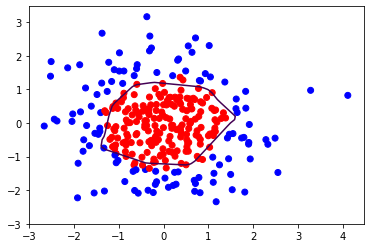

In [29]:
# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))  # squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，不包含正则化
# 不清楚的数据，建议print出来查看


Epoch 0, loss: 0.294650599360466
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.26761483401060104
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.2358630821108818
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.206857331097126
Test_acc: 0.5
--------------------------
Epoch 4, loss: 0.19015108048915863
Test_acc: 0.36666666666666664
--------------------------
Epoch 5, loss: 0.1660173498094082
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.15278729051351547
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.1409653928130865
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.12864402867853642
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.12073549628257751
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.11568193510174751
Test_acc: 0.5333333333333333
--------------------------
Epoch 11, loss: 

Test_acc: 1.0
--------------------------
Epoch 108, loss: 0.04468798264861107
Test_acc: 1.0
--------------------------
Epoch 109, loss: 0.04448569007217884
Test_acc: 1.0
--------------------------
Epoch 110, loss: 0.04428633861243725
Test_acc: 1.0
--------------------------
Epoch 111, loss: 0.04408986959606409
Test_acc: 1.0
--------------------------
Epoch 112, loss: 0.04389623459428549
Test_acc: 1.0
--------------------------
Epoch 113, loss: 0.04370534606277943
Test_acc: 1.0
--------------------------
Epoch 114, loss: 0.04351716674864292
Test_acc: 1.0
--------------------------
Epoch 115, loss: 0.04333163611590862
Test_acc: 1.0
--------------------------
Epoch 116, loss: 0.04314869921654463
Test_acc: 1.0
--------------------------
Epoch 117, loss: 0.042968313209712505
Test_acc: 1.0
--------------------------
Epoch 118, loss: 0.042790407314896584
Test_acc: 1.0
--------------------------
Epoch 119, loss: 0.04261494427919388
Test_acc: 1.0
--------------------------
Epoch 120, loss: 0.04

Test_acc: 1.0
--------------------------
Epoch 216, loss: 0.03247058670967817
Test_acc: 1.0
--------------------------
Epoch 217, loss: 0.03240793850272894
Test_acc: 1.0
--------------------------
Epoch 218, loss: 0.03234580112621188
Test_acc: 1.0
--------------------------
Epoch 219, loss: 0.032284161541610956
Test_acc: 1.0
--------------------------
Epoch 220, loss: 0.032223002053797245
Test_acc: 1.0
--------------------------
Epoch 221, loss: 0.03216234082356095
Test_acc: 1.0
--------------------------
Epoch 222, loss: 0.03210216201841831
Test_acc: 1.0
--------------------------
Epoch 223, loss: 0.03204245958477259
Test_acc: 1.0
--------------------------
Epoch 224, loss: 0.03198322281241417
Test_acc: 1.0
--------------------------
Epoch 225, loss: 0.031924447510391474
Test_acc: 1.0
--------------------------
Epoch 226, loss: 0.03186613414436579
Test_acc: 1.0
--------------------------
Epoch 227, loss: 0.031808275263756514
Test_acc: 1.0
--------------------------
Epoch 228, loss: 0.

Test_acc: 1.0
--------------------------
Epoch 322, loss: 0.027795109432190657
Test_acc: 1.0
--------------------------
Epoch 323, loss: 0.027764109428972006
Test_acc: 1.0
--------------------------
Epoch 324, loss: 0.027733272407203913
Test_acc: 1.0
--------------------------
Epoch 325, loss: 0.027702607214450836
Test_acc: 1.0
--------------------------
Epoch 326, loss: 0.027672105934470892
Test_acc: 1.0
--------------------------
Epoch 327, loss: 0.027641762048006058
Test_acc: 1.0
--------------------------
Epoch 328, loss: 0.02761159837245941
Test_acc: 1.0
--------------------------
Epoch 329, loss: 0.027581583708524704
Test_acc: 1.0
--------------------------
Epoch 330, loss: 0.02755173621699214
Test_acc: 1.0
--------------------------
Epoch 331, loss: 0.027522034011781216
Test_acc: 1.0
--------------------------
Epoch 332, loss: 0.02749250503256917
Test_acc: 1.0
--------------------------
Epoch 333, loss: 0.027463125064969063
Test_acc: 1.0
--------------------------
Epoch 334, los

Test_acc: 1.0
--------------------------
Epoch 431, loss: 0.02517638960853219
Test_acc: 1.0
--------------------------
Epoch 432, loss: 0.025157777592539787
Test_acc: 1.0
--------------------------
Epoch 433, loss: 0.02513924427330494
Test_acc: 1.0
--------------------------
Epoch 434, loss: 0.025120781268924475
Test_acc: 1.0
--------------------------
Epoch 435, loss: 0.0251024030148983
Test_acc: 1.0
--------------------------
Epoch 436, loss: 0.025084097869694233
Test_acc: 1.0
--------------------------
Epoch 437, loss: 0.025065850000828505
Test_acc: 1.0
--------------------------
Epoch 438, loss: 0.02504768129438162
Test_acc: 1.0
--------------------------
Epoch 439, loss: 0.025029589422047138
Test_acc: 1.0
--------------------------
Epoch 440, loss: 0.025011561810970306
Test_acc: 1.0
--------------------------
Epoch 441, loss: 0.02499361988157034
Test_acc: 1.0
--------------------------
Epoch 442, loss: 0.02497573522850871
Test_acc: 1.0
--------------------------
Epoch 443, loss: 0

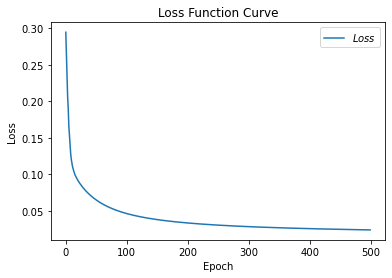

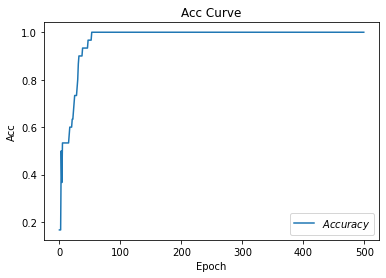

In [32]:
# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.2  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # sgd-momentun  
        m_w = beta * m_w + (1 - beta) * grads[0]
        m_b = beta * m_b + (1 - beta) * grads[1]
        w1.assign_sub(lr * m_w)
        b1.assign_sub(lr * m_b)
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


Epoch 0, loss: 0.2528788633644581
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.17821526899933815
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.15621443465352058
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.1420477293431759
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.13362513855099678
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.1275476086884737
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.12286805920302868
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.11908590979874134
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.11591362580657005
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.11317718029022217
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.11076570674777031
Test_acc: 0.5333333333333333
--------------------------
E

Epoch 104, loss: 0.05668578017503023
Test_acc: 1.0
--------------------------
Epoch 105, loss: 0.056480354629457
Test_acc: 1.0
--------------------------
Epoch 106, loss: 0.05627741012722254
Test_acc: 1.0
--------------------------
Epoch 107, loss: 0.056076898239552975
Test_acc: 1.0
--------------------------
Epoch 108, loss: 0.055878765881061554
Test_acc: 1.0
--------------------------
Epoch 109, loss: 0.05568298138678074
Test_acc: 1.0
--------------------------
Epoch 110, loss: 0.05548948608338833
Test_acc: 1.0
--------------------------
Epoch 111, loss: 0.05529824458062649
Test_acc: 1.0
--------------------------
Epoch 112, loss: 0.05510922521352768
Test_acc: 1.0
--------------------------
Epoch 113, loss: 0.054922365583479404
Test_acc: 1.0
--------------------------
Epoch 114, loss: 0.054737647995352745
Test_acc: 1.0
--------------------------
Epoch 115, loss: 0.05455503333359957
Test_acc: 1.0
--------------------------
Epoch 116, loss: 0.05437446851283312
Test_acc: 1.0
-----------

Test_acc: 1.0
--------------------------
Epoch 213, loss: 0.04302659537643194
Test_acc: 1.0
--------------------------
Epoch 214, loss: 0.04294993728399277
Test_acc: 1.0
--------------------------
Epoch 215, loss: 0.0428738035261631
Test_acc: 1.0
--------------------------
Epoch 216, loss: 0.042798192240297794
Test_acc: 1.0
--------------------------
Epoch 217, loss: 0.04272308759391308
Test_acc: 1.0
--------------------------
Epoch 218, loss: 0.0426484951749444
Test_acc: 1.0
--------------------------
Epoch 219, loss: 0.042574407532811165
Test_acc: 1.0
--------------------------
Epoch 220, loss: 0.042500815354287624
Test_acc: 1.0
--------------------------
Epoch 221, loss: 0.04242771491408348
Test_acc: 1.0
--------------------------
Epoch 222, loss: 0.042355102486908436
Test_acc: 1.0
--------------------------
Epoch 223, loss: 0.042282977141439915
Test_acc: 1.0
--------------------------
Epoch 224, loss: 0.0422113249078393
Test_acc: 1.0
--------------------------
Epoch 225, loss: 0.04

Test_acc: 1.0
--------------------------
Epoch 326, loss: 0.036741362884640694
Test_acc: 1.0
--------------------------
Epoch 327, loss: 0.03670099191367626
Test_acc: 1.0
--------------------------
Epoch 328, loss: 0.03666080627590418
Test_acc: 1.0
--------------------------
Epoch 329, loss: 0.03662080829963088
Test_acc: 1.0
--------------------------
Epoch 330, loss: 0.03658100124448538
Test_acc: 1.0
--------------------------
Epoch 331, loss: 0.036541379522532225
Test_acc: 1.0
--------------------------
Epoch 332, loss: 0.03650194499641657
Test_acc: 1.0
--------------------------
Epoch 333, loss: 0.036462688352912664
Test_acc: 1.0
--------------------------
Epoch 334, loss: 0.03642361657693982
Test_acc: 1.0
--------------------------
Epoch 335, loss: 0.036384725477546453
Test_acc: 1.0
--------------------------
Epoch 336, loss: 0.036346007604151964
Test_acc: 1.0
--------------------------
Epoch 337, loss: 0.03630747413262725
Test_acc: 1.0
--------------------------
Epoch 338, loss: 0

Test_acc: 1.0
--------------------------
Epoch 439, loss: 0.033120356034487486
Test_acc: 1.0
--------------------------
Epoch 440, loss: 0.033094929065555334
Test_acc: 1.0
--------------------------
Epoch 441, loss: 0.03306959010660648
Test_acc: 1.0
--------------------------
Epoch 442, loss: 0.03304435592144728
Test_acc: 1.0
--------------------------
Epoch 443, loss: 0.033019200433045626
Test_acc: 1.0
--------------------------
Epoch 444, loss: 0.032994136679917574
Test_acc: 1.0
--------------------------
Epoch 445, loss: 0.03296916279941797
Test_acc: 1.0
--------------------------
Epoch 446, loss: 0.03294427040964365
Test_acc: 1.0
--------------------------
Epoch 447, loss: 0.03291947487741709
Test_acc: 1.0
--------------------------
Epoch 448, loss: 0.032894755713641644
Test_acc: 1.0
--------------------------
Epoch 449, loss: 0.03287012781947851
Test_acc: 1.0
--------------------------
Epoch 450, loss: 0.03284558840095997
Test_acc: 1.0
--------------------------
Epoch 451, loss: 0

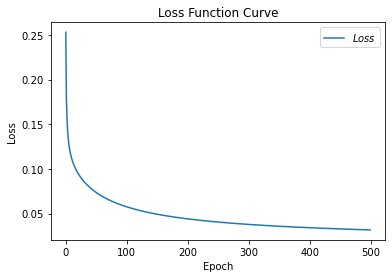

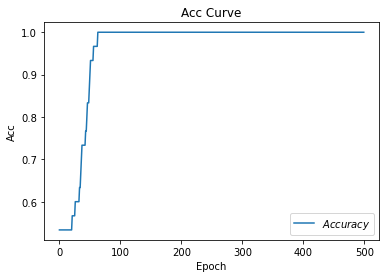

In [33]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # adagrad
        v_w += tf.square(grads[0])
        v_b += tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


Epoch 0, loss: 0.3926014006137848
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.20467262156307697
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.1720195785164833
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.15918107517063618
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.15706434845924377
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.21921370178461075
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.15996415726840496
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.176101204007864
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.1541191264986992
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.16151177883148193
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.12263434194028378
Test_acc: 0.8333333333333334
--------------------------
Ep

Test_acc: 1.0
--------------------------
Epoch 98, loss: 0.04060484142974019
Test_acc: 1.0
--------------------------
Epoch 99, loss: 0.04028052277863026
Test_acc: 1.0
--------------------------
Epoch 100, loss: 0.039962753653526306
Test_acc: 1.0
--------------------------
Epoch 101, loss: 0.03965118154883385
Test_acc: 1.0
--------------------------
Epoch 102, loss: 0.03934560529887676
Test_acc: 1.0
--------------------------
Epoch 103, loss: 0.03904576413333416
Test_acc: 1.0
--------------------------
Epoch 104, loss: 0.038751456420868635
Test_acc: 1.0
--------------------------
Epoch 105, loss: 0.03846247401088476
Test_acc: 1.0
--------------------------
Epoch 106, loss: 0.038178617134690285
Test_acc: 1.0
--------------------------
Epoch 107, loss: 0.03789983130991459
Test_acc: 1.0
--------------------------
Epoch 108, loss: 0.03762591863051057
Test_acc: 1.0
--------------------------
Epoch 109, loss: 0.0373567515052855
Test_acc: 1.0
--------------------------
Epoch 110, loss: 0.0370

Test_acc: 1.0
--------------------------
Epoch 204, loss: 0.029362996807321906
Test_acc: 1.0
--------------------------
Epoch 205, loss: 0.029379129351582378
Test_acc: 1.0
--------------------------
Epoch 206, loss: 0.02939245564630255
Test_acc: 1.0
--------------------------
Epoch 207, loss: 0.029403402702882886
Test_acc: 1.0
--------------------------
Epoch 208, loss: 0.029412382282316685
Test_acc: 1.0
--------------------------
Epoch 209, loss: 0.02941957296570763
Test_acc: 1.0
--------------------------
Epoch 210, loss: 0.029425166896544397
Test_acc: 1.0
--------------------------
Epoch 211, loss: 0.029429364833049476
Test_acc: 1.0
--------------------------
Epoch 212, loss: 0.029432279989123344
Test_acc: 1.0
--------------------------
Epoch 213, loss: 0.029434079537168145
Test_acc: 1.0
--------------------------
Epoch 214, loss: 0.029434810916427523
Test_acc: 1.0
--------------------------
Epoch 215, loss: 0.029434565221890807
Test_acc: 1.0
--------------------------
Epoch 216, lo

Test_acc: 1.0
--------------------------
Epoch 317, loss: 0.02862593746976927
Test_acc: 1.0
--------------------------
Epoch 318, loss: 0.028620376309845597
Test_acc: 1.0
--------------------------
Epoch 319, loss: 0.02861486776964739
Test_acc: 1.0
--------------------------
Epoch 320, loss: 0.028609469009097666
Test_acc: 1.0
--------------------------
Epoch 321, loss: 0.028604110470041633
Test_acc: 1.0
--------------------------
Epoch 322, loss: 0.028598807228263468
Test_acc: 1.0
--------------------------
Epoch 323, loss: 0.02859355928376317
Test_acc: 1.0
--------------------------
Epoch 324, loss: 0.028588410874363035
Test_acc: 1.0
--------------------------
Epoch 325, loss: 0.028583299077581614
Test_acc: 1.0
--------------------------
Epoch 326, loss: 0.028578205732628703
Test_acc: 1.0
--------------------------
Epoch 327, loss: 0.028573202434927225
Test_acc: 1.0
--------------------------
Epoch 328, loss: 0.028568267181981355
Test_acc: 1.0
--------------------------
Epoch 329, los

Epoch 428, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 429, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 430, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 431, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 432, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 433, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 434, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 435, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 436, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 437, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 438, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 439, loss: nan
Test_acc: 0.36666666666666664
--------------------------
Epoch 440, loss: nan
Test_acc: 0.36666666666666664
-------------

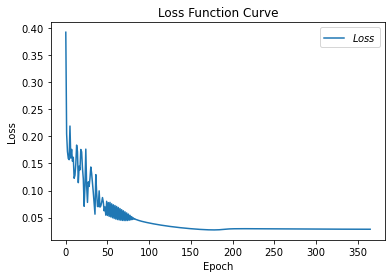

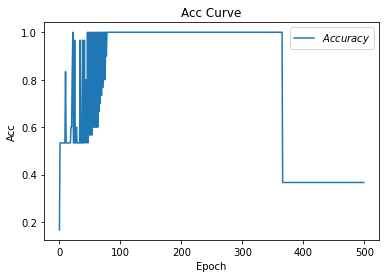

In [35]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # rmsprop
        v_w = beta * v_w + (1 - beta) * tf.square(grads[0])
        v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


Epoch 0, loss: 0.2198411151766777
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.14480534568428993
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.10274326056241989
Test_acc: 0.6666666666666666
--------------------------
Epoch 3, loss: 0.08922175318002701
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.08600811008363962
Test_acc: 0.9
--------------------------
Epoch 5, loss: 0.06994965393096209
Test_acc: 0.8
--------------------------
Epoch 6, loss: 0.06724501121789217
Test_acc: 0.8
--------------------------
Epoch 7, loss: 0.06104531977325678
Test_acc: 1.0
--------------------------
Epoch 8, loss: 0.05573825631290674
Test_acc: 0.9333333333333333
--------------------------
Epoch 9, loss: 0.05405296105891466
Test_acc: 1.0
--------------------------
Epoch 10, loss: 0.049092075787484646
Test_acc: 1.0
--------------------------
Epoch 11, loss: 0.04825880005955696
Test_acc: 1.0
--------------------------
Epoch 12, l

Test_acc: 1.0
--------------------------
Epoch 107, loss: 0.0187575442250818
Test_acc: 1.0
--------------------------
Epoch 108, loss: 0.018711733631789684
Test_acc: 1.0
--------------------------
Epoch 109, loss: 0.018666609656065702
Test_acc: 1.0
--------------------------
Epoch 110, loss: 0.018622165778651834
Test_acc: 1.0
--------------------------
Epoch 111, loss: 0.018578336341306567
Test_acc: 1.0
--------------------------
Epoch 112, loss: 0.01853514672257006
Test_acc: 1.0
--------------------------
Epoch 113, loss: 0.018492575269192457
Test_acc: 1.0
--------------------------
Epoch 114, loss: 0.018450585193932056
Test_acc: 1.0
--------------------------
Epoch 115, loss: 0.01840919256210327
Test_acc: 1.0
--------------------------
Epoch 116, loss: 0.018368368968367577
Test_acc: 1.0
--------------------------
Epoch 117, loss: 0.01832809764891863
Test_acc: 1.0
--------------------------
Epoch 118, loss: 0.01828837115317583
Test_acc: 1.0
--------------------------
Epoch 119, loss: 

Test_acc: 1.0
--------------------------
Epoch 215, loss: 0.015940472716465592
Test_acc: 1.0
--------------------------
Epoch 216, loss: 0.015925515443086624
Test_acc: 1.0
--------------------------
Epoch 217, loss: 0.015910682966932654
Test_acc: 1.0
--------------------------
Epoch 218, loss: 0.015895957360044122
Test_acc: 1.0
--------------------------
Epoch 219, loss: 0.01588133769109845
Test_acc: 1.0
--------------------------
Epoch 220, loss: 0.01586684910580516
Test_acc: 1.0
--------------------------
Epoch 221, loss: 0.015852451091632247
Test_acc: 1.0
--------------------------
Epoch 222, loss: 0.015838180668652058
Test_acc: 1.0
--------------------------
Epoch 223, loss: 0.01582400524057448
Test_acc: 1.0
--------------------------
Epoch 224, loss: 0.015809933189302683
Test_acc: 1.0
--------------------------
Epoch 225, loss: 0.01579597615636885
Test_acc: 1.0
--------------------------
Epoch 226, loss: 0.01578211970627308
Test_acc: 1.0
--------------------------
Epoch 227, loss:

Test_acc: 1.0
--------------------------
Epoch 325, loss: 0.014785275561735034
Test_acc: 1.0
--------------------------
Epoch 326, loss: 0.014777948381379247
Test_acc: 1.0
--------------------------
Epoch 327, loss: 0.014770687324926257
Test_acc: 1.0
--------------------------
Epoch 328, loss: 0.014763460494577885
Test_acc: 1.0
--------------------------
Epoch 329, loss: 0.014756264863535762
Test_acc: 1.0
--------------------------
Epoch 330, loss: 0.014749118709005415
Test_acc: 1.0
--------------------------
Epoch 331, loss: 0.014742011087946594
Test_acc: 1.0
--------------------------
Epoch 332, loss: 0.014734933734871447
Test_acc: 1.0
--------------------------
Epoch 333, loss: 0.014727886184118688
Test_acc: 1.0
--------------------------
Epoch 334, loss: 0.014720903942361474
Test_acc: 1.0
--------------------------
Epoch 335, loss: 0.014713935437612236
Test_acc: 1.0
--------------------------
Epoch 336, loss: 0.014707008609548211
Test_acc: 1.0
--------------------------
Epoch 337, 

Epoch 431, loss: 0.014185026986524463
Test_acc: 1.0
--------------------------
Epoch 432, loss: 0.014180672471411526
Test_acc: 1.0
--------------------------
Epoch 433, loss: 0.014176323194988072
Test_acc: 1.0
--------------------------
Epoch 434, loss: 0.014172004186548293
Test_acc: 1.0
--------------------------
Epoch 435, loss: 0.014167705667205155
Test_acc: 1.0
--------------------------
Epoch 436, loss: 0.014163424959406257
Test_acc: 1.0
--------------------------
Epoch 437, loss: 0.014159146347083151
Test_acc: 1.0
--------------------------
Epoch 438, loss: 0.014154904056340456
Test_acc: 1.0
--------------------------
Epoch 439, loss: 0.01415067573543638
Test_acc: 1.0
--------------------------
Epoch 440, loss: 0.01414646825287491
Test_acc: 1.0
--------------------------
Epoch 441, loss: 0.014142273692414165
Test_acc: 1.0
--------------------------
Epoch 442, loss: 0.014138099737465382
Test_acc: 1.0
--------------------------
Epoch 443, loss: 0.014133933349512517
Test_acc: 1.0
--

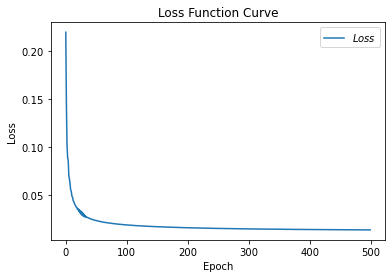

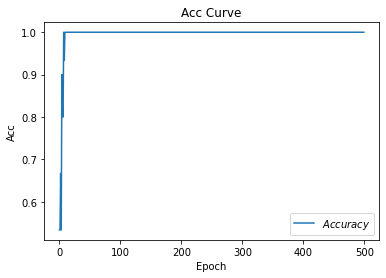

In [36]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
v_w, v_b = 0, 0
beta1, beta2 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
 ##########################################################################       
        global_step += 1
 ##########################################################################       
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

##########################################################################
 # adam
        m_w = beta1 * m_w + (1 - beta1) * grads[0]
        m_b = beta1 * m_b + (1 - beta1) * grads[1]
        v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
        v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])

        m_w_correction = m_w / (1 - tf.pow(beta1, int(global_step)))
        m_b_correction = m_b / (1 - tf.pow(beta1, int(global_step)))
        v_w_correction = v_w / (1 - tf.pow(beta2, int(global_step)))
        v_b_correction = v_b / (1 - tf.pow(beta2, int(global_step)))

        w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
        b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))
##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况
